In [1]:
from nptdms import TdmsFile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime


# path = r"D:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Patients ePatch data\Patient 5\recording 1\Patient 5_1.tdms"
path = r"D:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Patients ePatch data\Patient 6\recording 1\Patient 6_1.tdms"


In [2]:
tdms_file = TdmsFile.read(path)
print(tdms_file.properties)
channel1 = tdms_file.groups()[0]
# select EKG channel if present, otherwise take the first channel in the group
channels = channel1.channels()
ecg_channel = next((ch for ch in channels if ch.name.lower() == 'ekg'), channels[0])

# load raw ECG samples as a float numpy array
ecg_raw = ecg_channel.data.astype(float)

# read common waveform properties with safe fallbacks
wf_start = ecg_channel.properties.get('wf_start_time', ecg_channel.properties.get('wf_start', None))
wf_increment = float(ecg_channel.properties.get('wf_increment', ecg_channel.properties.get('wf_val', 0.0)))
wf_samples = int(ecg_channel.properties.get('wf_samples', ecg_raw.shape[0]))

print(f"Channel: {ecg_channel.name}, samples={ecg_raw.shape[0]}, wf_start={wf_start}, wf_increment={wf_increment}")


OrderedDict([('name', 'Søren Graversen 23012017_kl_135731__25012017_kl_1300.tdms'), ('author', 'Jesper'), ('description', ''), ('registertxt1', 'Written by National Instruments LabVIEW')])
Channel: EKG, samples=88105472, wf_start=2017-01-23T12:57:31.000000, wf_increment=0.001953125


In [ ]:
# # time axis in seconds relative to wf_start
# time_seconds = np.arange(ecg_raw.shape[0]) * wf_increment

# # absolute datetimes for each sample if wf_start is convertible
# try:
#     start_dt = pd.to_datetime(wf_start).to_pydatetime()
#     time_datetimes = [start_dt + datetime.timedelta(seconds=float(s)) for s in time_seconds]
# except Exception:
#     time_datetimes = None


In [3]:
# Print all groups and channels in the TDMS file
for group in tdms_file.groups():
    print(f"Group: {group.name}")
    for channel in group.channels():
        print(f"  Channel: {channel.name}")
        for prop_name, prop_value in channel.properties.items():
            print(f"    Property: {prop_name} = {prop_value}")

Group: Untitled
  Channel: EKG
    Property: wf_start_time = 2017-01-23T12:57:31.000000
    Property: wf_start_offset = 0.0
    Property: wf_increment = 0.001953125
    Property: wf_samples = 88105472
    Property: DigitalMaximum = 32767
    Property: DigitalMinimum = -32768
    Property: NI_ChannelName = EKG
    Property: NI_ExpIsRelativeTime = False
    Property: wf_time_pref = absolute
    Property: NI_ExpStartTimeStamp = 2017-01-23T12:57:31.000000
    Property: NI_ExpTimeStamp = 2017-01-23T12:57:31.000000
    Property: NI_ExpXDimension = t
    Property: wf_xname = Time
    Property: wf_xunit_string = s
    Property: NI_UnitDescription = uV
    Property: unit_string = uV
    Property: PhysicalMaximum = 90298.0
    Property: PhysicalMinimum = -90298.0
    Property: PreFilter = 
    Property: TransducerType = 
    Property: ValsPerRec = 128


In [4]:

# time1 = [datetime.datetime(2016, 10, 13, 7, 26, 57), datetime.datetime(2016, 10, 13, 7, 26, 31), datetime.datetime(2016, 10, 13, 7, 28, 57), datetime.datetime(2016, 10, 13, 7, 26, 58)]
# time2 = [datetime.datetime(2016, 10, 13, 14, 47, 50), datetime.datetime(2016, 10, 13, 14, 47, 29), datetime.datetime(2016, 10, 13, 14, 49, 23), datetime.datetime(2016, 10, 13, 14, 49, 24)]
# time3 = [datetime.datetime(2016, 10, 13, 15, 36, 28), datetime.datetime(2016, 10, 13, 15, 36, 30), datetime.datetime(2016, 10, 13, 15, 38, 38), datetime.datetime(2016, 10, 13, 15, 38, 38)]

time1 = [datetime.datetime(2017, 1, 24, 20, 42, 18), datetime.datetime(2017, 1, 24, 20, 42, 14), datetime.datetime(2017, 1, 24, 20, 44, 22), datetime.datetime(2017, 1, 24, 20, 44, 25)]

# Seizure_times = [time1, time2, time3]

In [5]:
# print(Seizure_times)

In [6]:
import arrow

timestamp = channel.properties['wf_start_time']
local_time = arrow.get(timestamp.astype(datetime.datetime)).to('local')
print(local_time.format())

2017-01-23 13:57:31+01:00


In [7]:
local_time

<Arrow [2017-01-23T13:57:31+01:00]>

In [8]:
local_time.datetime

datetime.datetime(2017, 1, 23, 13, 57, 31, tzinfo=tzlocal())

In [9]:
# Flip the calculation: time1 - timestamp

# convert numpy.datetime64 timestamp to Python datetime (overwrites ts_dt if present)
ts_dt = pd.to_datetime(timestamp).to_pydatetime()

# Differences: each datetime in time1 minus the timestamp
diffs_time1_timestamp = [dt - ts_dt for dt in time1]

# Make time1 datetimes timezone-aware in the same timezone as local_time (overwrite if needed)
seizure_time1_arrows = [arrow.get(dt).replace(tzinfo=local_time.tzinfo) for dt in time1]

# Differences: each time1 (as Arrow) minus local_time
diffs_time1_local_time = [s - local_time for s in seizure_time1_arrows]

# Display results
print("timestamp (converted) ->", ts_dt)
print("Differences (time1 - timestamp):")
for i, d in enumerate(diffs_time1_timestamp, 1):
    print(f"  {i}: {d}")

print("\nlocal_time ->", local_time)
print("Differences (time1 treated in same timezone - local_time):")
for i, d in enumerate(diffs_time1_local_time, 1):
    print(f"  {i}: {d}")

timestamp (converted) -> 2017-01-23 12:57:31
Differences (time1 - timestamp):
  1: 1 day, 7:44:47
  2: 1 day, 7:44:43
  3: 1 day, 7:46:51
  4: 1 day, 7:46:54

local_time -> 2017-01-23T13:57:31+01:00
Differences (time1 treated in same timezone - local_time):
  1: 1 day, 6:44:47
  2: 1 day, 6:44:43
  3: 1 day, 6:46:51
  4: 1 day, 6:46:54


58514944.0
58578432.0
56671744.0
56735232.0


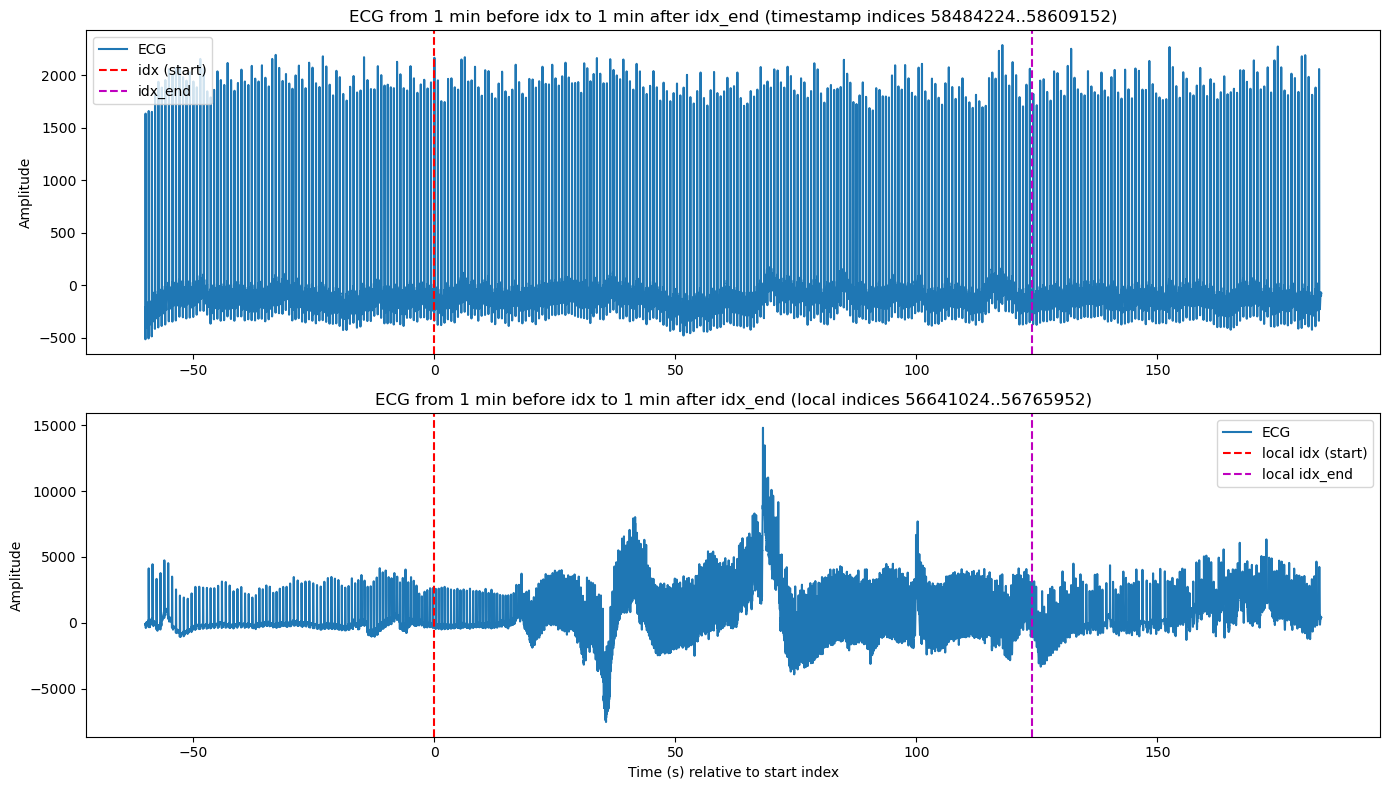

In [13]:
wf_increment = channel.properties['wf_increment']
num_samples = channel.properties['wf_samples']

timestamp_window_idx = diffs_time1_timestamp[0].total_seconds() / wf_increment
print(timestamp_window_idx)
timestamp_window_idx_end = diffs_time1_timestamp[2].total_seconds() / wf_increment
print(timestamp_window_idx_end)
local_time_window_idx = diffs_time1_local_time[0].total_seconds() / wf_increment
print(local_time_window_idx)
local_time_window_idx_end = diffs_time1_local_time[2].total_seconds() / wf_increment
print(local_time_window_idx_end)

# show data from 1 minute before idx to 1 minute after idx_end for both timestamp and local_time spans
pad_seconds = 60
pad_samples = int(round(pad_seconds / wf_increment))

# timestamp-based span
ts_idx = int(round(timestamp_window_idx))
ts_idx_end = int(round(timestamp_window_idx_end))
ts_plot_start = max(0, ts_idx - pad_samples)
ts_plot_end = min(ecg_raw.shape[0], ts_idx_end + pad_samples)
ts_plot_seg = ecg_raw[ts_plot_start:ts_plot_end]
t_ts_plot = (np.arange(ts_plot_start, ts_plot_end) - ts_idx) * wf_increment  # seconds relative to first idx

# local_time-based span
lt_idx = int(round(local_time_window_idx))
lt_idx_end = int(round(local_time_window_idx_end))
lt_plot_start = max(0, lt_idx - pad_samples)
lt_plot_end = min(ecg_raw.shape[0], lt_idx_end + pad_samples)
lt_plot_seg = ecg_raw[lt_plot_start:lt_plot_end]
t_lt_plot = (np.arange(lt_plot_start, lt_plot_end) - lt_idx) * wf_increment  # seconds relative to local idx

plt.figure(figsize=(14, 8))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(t_ts_plot, ts_plot_seg, label='ECG')
# vertical lines at idx (0) and idx_end
ax1.axvline(0, color='r', linestyle='--', label='idx (start)')
ax1.axvline((ts_idx_end - ts_idx) * wf_increment, color='m', linestyle='--', label='idx_end')
ax1.set_title(f'ECG from 1 min before idx to 1 min after idx_end (timestamp indices {ts_plot_start}..{ts_plot_end})')
ax1.set_ylabel('Amplitude')
ax1.legend()

ax2 = plt.subplot(2, 1, 2, sharex=None)
ax2.plot(t_lt_plot, lt_plot_seg, label='ECG')
ax2.axvline(0, color='r', linestyle='--', label='local idx (start)')
ax2.axvline((lt_idx_end - lt_idx) * wf_increment, color='m', linestyle='--', label='local idx_end')
ax2.set_title(f'ECG from 1 min before idx to 1 min after idx_end (local indices {lt_plot_start}..{lt_plot_end})')
ax2.set_xlabel('Time (s) relative to start index')
ax2.set_ylabel('Amplitude')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
import os
# Load through all patient folders
path_patients_folder = r"D:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Patients ePatch data"
for patient_folder in os.listdir(path_patients_folder):
    patient_path = os.path.join(path_patients_folder, patient_folder)
    if os.path.isdir(patient_path):
        print(f"Processing patient folder: {patient_folder}")
        for recording_folder in os.listdir(patient_path):
            recording_path = os.path.join(patient_path, recording_folder)
            if os.path.isdir(recording_path):
                print(f"  Processing recording folder: {recording_folder}")
                # if folder name contains 'enrollment' (case-insensitive) search one level deeper
                if 'enrollment' in recording_folder.lower() or 'enrollment' in recording_path.lower():
                    for subfolder in os.listdir(recording_path):
                        sub_path = os.path.join(recording_path, subfolder)
                        if os.path.isdir(sub_path):
                            print(f"    Entering enrollment subfolder: {subfolder}")
                            for file_name in os.listdir(sub_path):
                                if file_name.endswith('.tdms'):
                                    file_path = os.path.join(sub_path, file_name)
                                    print(f"      Found TDMS file: {file_name}")
                                    patient_number = file_name.split('_')
                                    print(f"      Patient number extracted: {patient_number[0]}")
                                    # Here you can add code to process each TDMS file as needed
                else:
                    for file_name in os.listdir(recording_path):
                        if file_name.endswith('.tdms'):
                            file_path = os.path.join(recording_path, file_name)
                            print(f"    Found TDMS file: {file_name}")
                            patient_number = file_name.split('_')
                            print(f"    Patient number extracted: {patient_number[0]}")
                            # Here you can add code to process each TDMS file as needed

Processing patient folder: Patient 1
  Processing recording folder: recording 1
    Found TDMS file: Patient 1_1.tdms
    Patient number extracted: Patient 1
  Processing recording folder: recording 2
    Found TDMS file: Patient 1_2.tdms
    Patient number extracted: Patient 1
Processing patient folder: Patient 10
  Processing recording folder: recording 1
    Found TDMS file: Patient 10_1.tdms
    Patient number extracted: Patient 10
Processing patient folder: Patient 11
  Processing recording folder: recording 1
    Found TDMS file: Patient 11_1.tdms
    Patient number extracted: Patient 11
  Processing recording folder: recording 2
    Found TDMS file: Patient 11_2.tdms
    Patient number extracted: Patient 11
Processing patient folder: Patient 12
  Processing recording folder: recording 1
    Found TDMS file: Patient 12_1.tdms
    Patient number extracted: Patient 12
  Processing recording folder: recording 2
    Found TDMS file: Patient 12_2.tdms
    Patient number extracted: Pat

In [ ]:
path_seizure_folder = r"D:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Seizure log ePatch patients with seizures"



In [ ]:
from ecg_quality.ECGQualityChecker import ECGQualityChecker  

checker = ECGQualityChecker()  
 
signal = ...	 

output = checker.process_signal(signal)  